## Contact Process (1+1) DP

In [1]:
# pip install -r requirements.txt
import numpy as np
import matplotlib.pyplot as plt
from algorithm import update_conf
from initialize import initial_conf
from matplotlib.animation import FuncAnimation
import networkx as nx
import fit as ce
from main_loops import main_tau, main_gamma_nu, main_nu, main_theta

### Control Parameters

In [85]:
d = 1                     #dimension
N = 20                    #number of nodes
init_infected = 1  #number of nodes initially infected

time_steps = 500
average_over = 500
ratio_list = np.linspace(1,15,7)  #ratio = infectio_rate/recovery_rate 

epoch_analysis = 'ON'

In [20]:
init_conf = initial_conf(N, init_infected,d)

infected_num_per_ratio = []
infected_num_per_time = []
rec_list = []

for ratio in ratio_list:
    config = init_conf.copy()
    infected_num_per_ens = []
    Epoch_list = []
    for ens in np.arange(average_over):
        config = init_conf.copy()
        epoch_list = []
        for t in np.arange(time_steps):
            config, rec_list = update_conf(config, ratio, d, rec_list, 1)
            if epoch_analysis=='ON':
                epoch_list.append(np.count_nonzero(config == 1))
        if epoch_analysis=='ON':
            Epoch_list.append(epoch_list)
        infected_num_per_ens.append(np.count_nonzero(config==1))  #number of infected at the end

    infected_num_per_time.append(np.mean(Epoch_list, axis = 0))
    infected_num_per_ratio.append(np.mean(infected_num_per_ens))

### Critical Ratio Analysis

In [46]:
# np.save('data/one_d_infected_num_per_ratio.npy', infected_num_per_ratio)
# np.save('data/one_d_infected_num_ratio_list.npy', ratio_list)

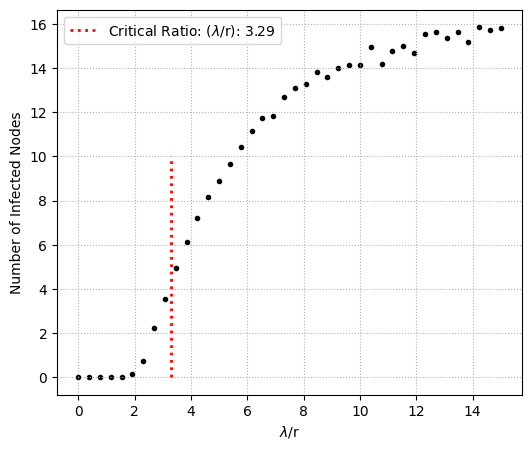

In [86]:
ratio_list = np.load('data/one_d_infected_num_ratio_list.npy')
infected_num = np.load('data/one_d_infected_num_per_ratio.npy')

fig = plt.figure(figsize = (6,5))
# critical ratio = 3.2978
plt.scatter(ratio_list, infected_num , marker = '.', color = 'black')
plt.xlabel("$\lambda$/r")  
plt.ylabel("Number of Infected Nodes")
# plt.xlim(1, 7)
plt.grid(ls= 'dotted')
plt.vlines(x=3.297, ymin=0, ymax=10, colors='red', ls=':', lw=2, label='Critical Ratio: ($\lambda$/r): 3.29')
plt.legend(loc='best')
fig.savefig("plots/one_dim/critical_ratio.png", bbox_inches = 'tight')

### Epoch Analysis

In [21]:
# np.save('data/one_d_infected_num_per_time.npy', infected_num_per_time)
# np.save('data/one_d_infected_num_time_steps.npy', np.arange(time_steps))

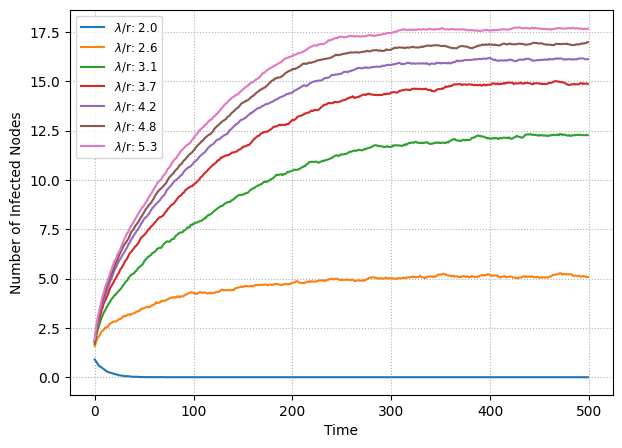

In [91]:
infected_num = np.load('data/one_d_infected_num_per_time.npy')
timesteps    = np.load('data/one_d_infected_num_time_steps.npy')

label_list   = ratio_list
fig = plt.figure(figsize = (7,5))
for e in range(len(infected_num)):
    plt.plot(timesteps, infected_num[e], label = '$\lambda$/r: '+str(round(label_list[e],1)))
plt.xlabel("Time")
plt.ylabel("Number of Infected Nodes")
plt.legend(loc='best', fontsize = 8.5)
plt.grid(ls= 'dotted')
fig.savefig("plots/one_dim/epoch.png", bbox_inches = 'tight')

## DyP (P2=0, P2 >0)
In case of dynamical percolation, besides p1 which is the probablity to be infected for the fist time, we have also p2 which is the porbability to be infected for the second time.

### Manual Analysis

In [109]:
# d = 2                     #dimension
# N = 20                    #lentgh of lattce
# init_infected = 1         #number of nodes initially infected
# time_steps = 10000     #maximum iteration
# average_over = 500
# # ratio_list = np.linspace(0.7,1.5 , 6)  #ratio = infection_rate/recovery_rate #best ratio = 4.68
# # ratio_list = [4.68]
# p_2 = 0       #prob of get infected after being recovered

In [6]:
init_conf = initial_conf(N, init_infected, d)

rec_list =           []
anim_list =          []
big_list =           []
big_epoch_list =     []
big_recovered_list = []
big_cluster_list   = []

for ratio in ratio_list:
    config = init_conf.copy()
    each_ratio_list =     []
    Epoch_list =          []
    each_recovered_list = []
    each_cluster_list   = []

    for ens in np.arange(average_over):
        config = init_conf.copy()
        epoch_list = []
        rec_list   = []

        for t in np.arange(time_steps):
            if np.count_nonzero(config == 1)==0:
                break
            
            #animation (just two states)
            for_anim = config.copy( )
            anim_list.append(for_anim) 

            #main update
            config, rec_list = update_conf(config, ratio, d, rec_list, p_2)
            #epoch analysis

            epoch_list.append(np.count_nonzero(config == 1))
        
        Epoch_list.append(epoch_list)
        each_ratio_list.append(np.count_nonzero(config == 1))  #number of infected for each esnemble
        each_recovered_list.append(len(rec_list))              #number of recovered for each ensemble
        each_cluster_list.append(len(rec_list))

    big_epoch_list.append(np.mean(Epoch_list, axis = 0))       #number of infected per time averaged 
    big_list.append(np.mean(each_ratio_list))                  #number of infted for each ratio
    big_recovered_list.append(np.mean(each_recovered_list))    #number of recovered for each ratio
    big_cluster_list.append(each_cluster_list)                 #dist. of sizes of clusters for differnet ratios

anim_list = np.array(anim_list)
np.save('data/anim_data.npy', anim_list)


### Number of Infected and Infected per Time

In [191]:
# np.save('data/num_inf_per_time_p0.npy',   big_epoch_list)   #p2 = 0  #this file is corrupt, run again
# np.save('data/num_inf_per_time_p0.2.npy', big_epoch_list)   #p2 = 0.2
# np.save('data/num_inf_per_time_p0.5.npy', big_epoch_list)   #p2 = 0.5

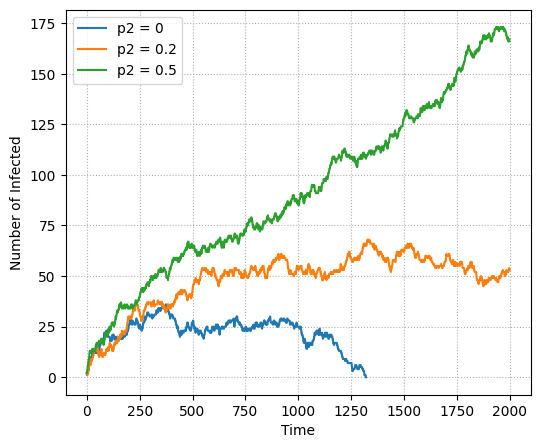

In [180]:
p1 = np.load('data/num_inf_per_time_p0.npy')[0]
p2 = np.load('data/num_inf_per_time_p0.2.npy')[0]
p3 = np.load('data/num_inf_per_time_p0.5.npy')[0]

fig = plt.figure(figsize = (6,5))
plt.plot(np.arange(len(p1)),  p1  , label= "p2 = 0")
plt.plot(np.arange(len(p2)),  p2  , label= "p2 = 0.2")
plt.plot(np.arange(len(p3)),  p3  , label= "p2 = 0.5")
plt.legend(loc= 'best')
plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.grid(ls= 'dotted')
fig.savefig("plots/two_dim/inf_num_per_time_L20_ratio4.68_avg1.png", bbox_inches = 'tight')

## Critical Exponents p2=0

### Critical Ratio and Tau (p2= 0)

In [11]:
ratio_list = np.linspace(4.5,5,6)
N = 20
p_2 = 0
avg = 50
mode = 'save'

Critical Ratio: 4.7
Estimated Tau 2.067969960153557
R-squared 0.9565508921241649


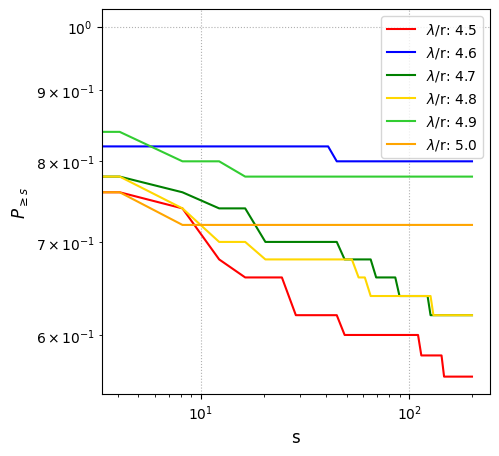

In [12]:
if mode=='save':
    np.save('data/tau_big_cluster_p{}.npy'.format(p_2), main_tau(N, ratio_list, avg, p_2))
    np.save('data/tau_ratio_p{}.npy'.format(p_2), ratio_list)

big_cluster_list = np.load('data/tau_big_cluster_p{}.npy'.format(p_2))
ratio_list = np.load('data/tau_ratio_p{}.npy'.format(p_2))

fig = plt.figure(figsize = (5,5))
label_list = ['$\lambda$/r: '+str(round(i,2)) for i in ratio_list]
color_list = ['red', 'blue', 'green', 'gold', 'limegreen', 'orange']

score_list = []
tau_list   = []

for i in range(len(big_cluster_list)):
    size_dist = np.array(big_cluster_list[i])
    label = label_list[i]
    s = np.linspace(0, 200, 50)
    prob = np.zeros(len(s))

    for j in range(len(s)):
        size = s[j]
        prob[j] = len(size_dist[size_dist >= size])/len(size_dist)

    est_tau, score, model = ce.ratio_tau_finder(s, prob)
    score_list.append(score)
    tau_list.append(est_tau)

    prob = prob[prob != 0]
    s = s[:len(prob)]

    plt.plot(s, prob, c = color_list[i], label = label)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("s", size = 12)
    plt.ylabel(r"$P_{\geq s}$", size = 12)
    plt.legend(markerscale = 2, fontsize =10)
    plt.grid(ls='dotted')

index_best = np.where(score_list == np.max(score_list))[0][0]
critical_ratio = ratio_list[index_best]
estimated_tau  = tau_list[index_best][0]
print('Critical Ratio:', critical_ratio)
print('Estimated Tau', estimated_tau )
print('R-squared',     np.max(score_list))
fig.savefig("plots/two_dim/Tau_p{}_L{}_avg{}.png".format(p_2, N, avg),bbox_inches ='tight')

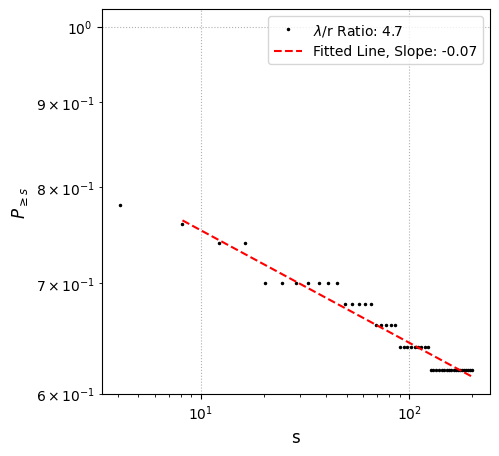

In [13]:
#retrieving the critical ratio prob list and size list
size_dist = np.array(big_cluster_list[np.where(ratio_list==critical_ratio)[0][0]])
s = np.linspace(0, 200, 50)
prob = np.zeros(len(s))
for j in range(len(s)):
    size = s[j]
    prob[j] = len(size_dist[size_dist >= size])/len(size_dist)
est_tau, score, model = ce.ratio_tau_finder(s, prob)

fig = plt.figure(figsize = (5,5))
label = '$\lambda$/r Ratio: ' + str(critical_ratio)
plt.plot(s, prob, marker = ".", linestyle = "None", markersize = 3,
         c = "black", label = label)
plt.plot(s[2:], s[2:]**(model.coef_)*np.exp(model.intercept_),
         c = "red", linestyle = "--", label = "Fitted Line, Slope: {}".format(round(model.coef_[0],2)))

plt.xscale("log")
plt.yscale("log")
plt.xlabel("s", size = 12)
plt.ylabel(r"$P_{\geq s}$", size = 12)
plt.legend(loc='best', fontsize =10)
plt.grid(ls='dotted')
fig.savefig("plots/two_dim/Tau_p{}_L{}_avg{}.png".format(p_2, N, avg),bbox_inches ='tight')

### Gamma/Niu Estimation (p2=0)

In [6]:
p_2 = 0.5
c_r = 0.7
L_list = np.arange(10,70,6)
average_over = 50
mode = 'save'   #for saving new result, otherwise, set 'load' for just loading


R-squared: 0.12
Estimated GammaNu: 0.08


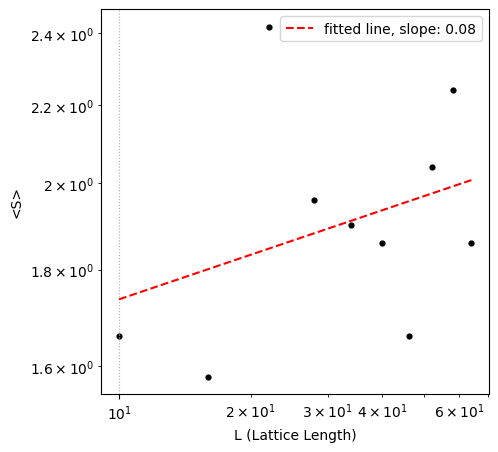

In [7]:
if mode !='load':
    np.save('data/gamma_niu_average_recovered_p{}.npy'.format(p_2), 
            main_gamma_nu(L_list, average_over, p_2, c_r)[0])
    np.save('data/gamma_niu_length_list_p{}.npy'.format(p_2), L_list)
big_recovered_list = np.load('data/gamma_niu_average_recovered_p{}.npy'.format(p_2))
L_list             = np.load('data/gamma_niu_length_list_p{}.npy'.format(p_2))
score_list =     []
GammaNu_list =   []
Gamma_nu, score,  model = ce.gamma_nu_finder(L_list, big_recovered_list)
score_list.append(score)
GammaNu_list.append(Gamma_nu)
print('\nR-squared:',   round(score,2))
print('Estimated GammaNu:', round(Gamma_nu[0],2))
fig = plt.figure(figsize = (5,5))
plt.scatter(L_list, big_recovered_list, s=12, c = "black")
plt.plot(L_list, np.array(L_list)**model.coef_*np.exp(model.intercept_), c = "red",
         linestyle = "--", label = "fitted line, slope: {}".format(round(model.coef_[0], 2)))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("L (Lattice Length)")
plt.ylabel("<S>")
plt.grid(ls = 'dotted')
plt.legend(loc='best')
plt.show()
fig.savefig("plots/two_dim/gammaNu_est_avg{}_p{}_ratio{}.png".format(average_over, p_2, c_r),bbox_inches = 'tight')

### Nu estimation (p2= 0)

In [11]:
p_2 = 0.2
c_r = 2.02
mode = 'save'   #for saving new result, otherwise, set 'load' for just loading

L_list = [10, 20, 40, 60]
avg = 50
rec_rate = 1/(1+c_r)
ratio_list = np.linspace(1,9,5)

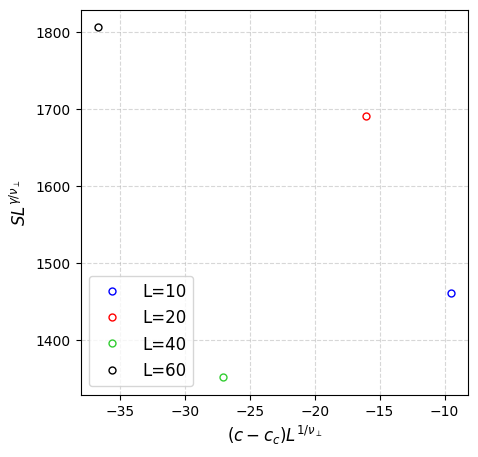

In [12]:
if mode !='load':
    np.save('data/nu_Y_axis_p{}.npy'.format(p_2), 
            main_nu(L_list, ratio_list, avg, p_2, c_r)[0])
    np.save('data/nu_X_axis_p{}.npy'.format(p_2), ratio_list)

Y_list = np.load('data/nu_Y_axis_p{}.npy'.format(p_2))
X_list = np.load('data/nu_X_axis_p{}.npy'.format(p_2))

label_list = ["L="+str(L_list[0]), "L="+str(L_list[1]), "L="+str(L_list[2]), "L="+str(L_list[3])]
color_list = ['blue', 'red', 'limegreen', 'black']

#test value for Nu
Nu = 1.33  #best Nu value for p0: 1.33

fig = plt.figure(figsize = (5,5))
for l in range(len(L_list)):
    X = (rec_rate - c_r) * (L_list[l]**(1/Nu))
    Y = Y_list[l]
    plt.plot(X, Y, c = color_list[l], marker = "o", linestyle = "None",
         mfc = "None", markersize = 5, label = label_list[l])

plt.ylabel(r"$SL^{\gamma/\nu_\perp}$", size = 12)
plt.xlabel(r"$(c-c_c)L^{1/\nu_\perp}$", size = 12)
plt.grid(alpha = 0.5, linestyle = "--")
plt.legend(fontsize = 12)
plt.show()

### Beta Estimation (p2= 0)

In [21]:
p_2 = 0.2
c_r = 4.67
mode = 'save'   #for saving new result, otherwise, set 'load' for just loading

L_list = np.arange(10,70,6)
avg = 50


R-squared 0.898
Estimated GammaNu 1.321
Beta: 0.146


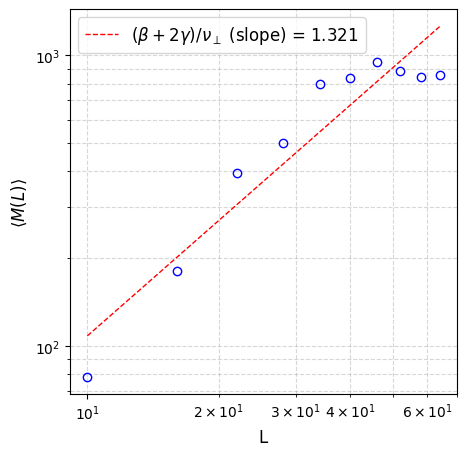

In [22]:
if mode !='load':
    np.save('data/beta_Y_p{}.npy'.format(p_2), main_gamma_nu(L_list, average_over, p_2, c_r)[0])
    np.save('data/beta_X_p{}.npy'.format(p_2), L_list)
M_list = np.load('data/beta_Y_p{}.npy'.format(p_2))
L_liss = np.load('data/beta_X_p{}.npy'.format(p_2))

est_exp,score, model = ce.beta_finder(L_list, M_list)
print('\nR-squared',         round(score,3))
print('Estimated GammaNu',   round(est_exp[0],3))
Gamma_nu = 1.79  #!!!!!!!!!!!11

##########################################333
Gamma = 1.79 * 1.33
beta = 3.69 * 1.33 - (2* Gamma)
###############################################

# Gamma = Gamma_nu[0] * Nu
# beta = est_exp[0] * Nu - (2* Gamma)

print('Beta:', round(beta,3))

fig = plt.figure(figsize = (5,5))
plt.plot(L_list, M_list, marker = "o", linestyle = "None", c = "blue", mfc = "None")
plt.plot(L_list, np.array(L_list)**model.coef_*np.exp(model.intercept_), c = "red",
         linestyle = "--", linewidth = 1,
         label = r"$(\beta + 2\gamma)/\nu_\perp$ (slope) = {}".format(round(model.coef_[0], 3)))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("L", size = 12)
plt.ylabel(r"$\langle M(L) \rangle$", size = 12)
plt.grid(which = "both", alpha = 0.5, linestyle = "--")
plt.legend(fontsize = 12)
plt.show()
fig.savefig("plots/two_dim/beta_est_avg{}_p{}_ratio{}.png".format(avg, p_2, c_r),bbox_inches = 'tight')

## Critical Exponents P>0

### Critical Ratio and Theta

In [29]:
p_2 = 0.2
ratio_list = np.linspace(7,10,8)
mode = 'save'

N = 20
time_steps = np.arange(20000)
avg = 10

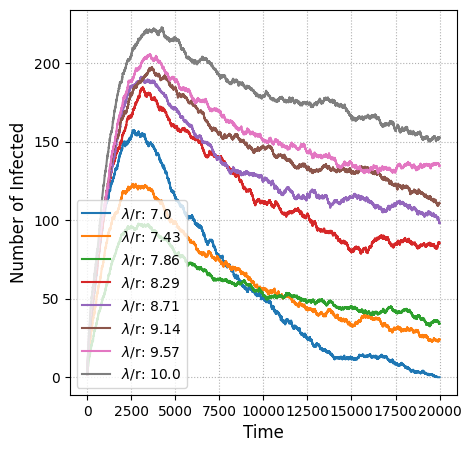

In [30]:
if mode=='save':
    np.save('data/theta_Y_p{}.npy'.format(p_2), main_theta(N, time_steps, ratio_list, avg, p_2))
    np.save('data/theta_X_p{}.npy'.format(p_2),     time_steps)
    np.save('data/theta_ratio_p{}.npy'.format(p_2), ratio_list)

big_num_inf    = np.load('data/theta_Y_p{}.npy'.format(p_2))
time_list      = np.load('data/theta_X_p{}.npy'.format(p_2))
ratio_list     = np.load('data/theta_ratio_p{}.npy'.format(p_2))

fig = plt.figure(figsize = (5,5))
label_list = ['$\lambda$/r: '+str(round(i,2)) for i in ratio_list]
# color_list = ['red', 'blue', 'green', 'gold', 'limegreen', 'orange']

score_list   = []
theta_list   = []

for i in range(len(big_num_inf)):
    num_inf = np.array(big_num_inf[i])
    label = label_list[i]
    # est_theta, score, model = ce.theta_finder(time_list, num_inf)
    # score_list.append(score)
    # theta_list.append(est_theta)

    plt.plot(time_list, num_inf, label = label)
    # plt.xscale("log")
    # plt.yscale("log")
    plt.xlabel("Time", size = 12)
    plt.ylabel(r"Number of Infected", size = 12)
    plt.legend(markerscale = 2, fontsize =10)
    plt.grid(ls='dotted')

# index_best = np.where(score_list == np.max(score_list))[0][0]
# critical_ratio  = ratio_list[index_best]
# estimated_theta  = theta_list[index_best][0]
# print('Critical Ratio:' , round(critical_ratio,2))
# print('Estimated Theta:', round(estimated_theta,2))
# print('R-squared:'      , round(np.max(score_list),2))
# fig.savefig("plots/two_dim/theta_p{}_L{}_avg{}.png".format(p_2, N, avg),bbox_inches ='tight')

In [16]:
# #retrieving the critical ratio prob list and size list
# size_dist = np.array(big_cluster_list[np.where(ratio_list==critical_ratio)[0][0]])
# s = np.linspace(0, 200, 50)
# prob = np.zeros(len(s))
# for j in range(len(s)):
#     size = s[j]
#     prob[j] = len(size_dist[size_dist >= size])/len(size_dist)
# est_tau, score, model = ce.ratio_tau_finder(s, prob)

# fig = plt.figure(figsize = (5,5))
# label = '$\lambda$/r Ratio: ' + str(critical_ratio)
# plt.plot(s, prob, marker = ".", linestyle = "None", markersize = 3,
#          c = "black", label = label)
# plt.plot(s[2:], s[2:]**(model.coef_)*np.exp(model.intercept_),
#          c = "red", linestyle = "--", label = "Fitted Line, Slope: {}".format(round(model.coef_[0],2)))

# plt.xscale("log")
# plt.yscale("log")
# plt.xlabel("s", size = 12)
# plt.ylabel(r"$P_{\geq s}$", size = 12)
# plt.legend(loc='best', fontsize =10)
# plt.grid(ls='dotted')
# fig.savefig("plots/two_dim/Tau_p{}_L{}_avg{}.png".format(p_2, N, avg),bbox_inches ='tight')